$\textbf{ROI slection}$<br>
$\text{In this workflow we crop the data temporaly and specialy. We also calculate the raw mc, pulse per ions and ion per pulse. }$

In [1]:
# Activate intractive functionality of matplotlib
%matplotlib ipympl
# Activate auto reload 
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
# import libraries
import os
import numpy as np
import sys
# import logging
import os.path as path
import matplotlib.pyplot as plt
from ipywidgets import fixed
from ipywidgets import interact_manual
from ipywidgets import widgets

# Local module and scripts
from pyccapt.calibration.calibration_tools import tools, share_variables, calibration, ion_selection
from pyccapt.calibration.calibration_tools import widgets as wd
from pyccapt.calibration.data_tools import data_tools, data_loadcrop, dataset_path_qt
from pyccapt.calibration.mc import mc_tools, tof_tools
from pyccapt.calibration.leap_tools import ccapt_tools

In [2]:
# Disable showing logging in Jupyter notebook
# logging.disable(sys.maxsize)

In [3]:
button = widgets.Button(
    description='load dataset',
)
@button.on_click
def open_file_on_click(b):
    """
    Event handler for button click event.
    Prompts the user to select a dataset file and stores the selected file path in the global variable dataset_path.
    """
    global dataset_path
    dataset_path = dataset_path_qt.gui_fname().decode('ASCII')
button

Button(description='load dataset', style=ButtonStyle())

In [4]:
# check pytables library and install it
# try:
#     import tables
# except:
#     !conda install --yes --prefix {sys.prefix} pytables

In [4]:
# create object for selection of instrument specifications of the dataset
tdc, pulse_mode, flightPathLength_d, t0_d, max_mc, det_diam = wd.dataset_instrument_specification_selection()

# Display lists and comboboxes to selected instrument specifications
display(tdc, pulse_mode, flightPathLength_d, t0_d, max_mc)

Dropdown(description='Data mode:', options=('surface_concept', 'roentdec', 'leap_epos', 'leap_pos'), value='su…

Dropdown(description='Pulse mode:', options=('voltage', 'laser'), value='voltage')

FloatText(value=110.0, description='Flight path length:')

FloatText(value=54.0, description='t0:')

FloatText(value=400.0, description='Max mc:')

In [40]:
# Calculate the maximum possible time of flight (TOF)
max_tof = int(tof_tools.mc2tof(max_mc.value, 1000, 0, 0, flightPathLength_d.value))

print('The maximum possible TOF is:', max_tof, 'ns')

The maximum possible TOF is: 5010 ns


In [41]:
dataset_main_path = os.path.dirname(dataset_path)
dataset_name_with_extention = os.path.basename(dataset_path)
dataset_name = os.path.splitext(dataset_name_with_extention)[0]

variables = share_variables.Variables()

variables.result_path = dataset_main_path + '/' + dataset_name + '/load_crop/'
if not os.path.isdir(variables.result_path):
    os.makedirs(variables.result_path, mode=0o777, exist_ok=True)
    
print('The result will be saved on the path:', variables.result_path)
print('=============================')
# dataset name
filename = dataset_path
savename = variables.result_path + '//' + dataset_name + '_cropped' + '.h5'

# Create data farame out of hdf5 file dataset
dld_group_storage = data_loadcrop.fetch_dataset_from_dld_grp(filename, tdc=tdc.value)
# Remove the data with tof greater thatn Max TOF or below 0 ns
data = data_tools.remove_invalid_data(dld_group_storage, max_tof)
print('=============================')
print('Total number of Ions:', len(data))

The result will be saved on the path: D:/pyccapt/tests/data/OLO_AL_6_data/load_crop/
{'cropped_dld': ['high_voltage', 'mc', 'pulse_voltage', 'start_counter', 't', 't_c', 'x', 'y'], 'dld': ['high_voltage', 'pulse', 'start_counter', 't', 'x', 'y'], 'oxcart': ['high_voltage', 'main_chamber_vacuum', 'num_events', 'pulse_voltage', 'temperature', 'time_counter'], 'tdc': ['channel', 'high_voltage', 'pulse_voltage', 'start_counter', 'time_data'], 'time': ['time_h', 'time_m', 'time_s']}
The number of data over max_tof: 100
Total number of Ions: 2000106


In [42]:
data

,high_voltage (V),pulse,start_counter,t (ns),x_det (cm),y_det (cm)
0,500.000000,500.000000,11367,3746.360808,-2.531020,2.537388
1,501.897491,501.897491,29203,2564.370792,1.423102,1.957959
2,503.034485,503.034485,44265,2048.793210,2.581959,-1.926122
3,503.034485,503.034485,47099,3220.811694,1.741469,2.091673
4,503.034485,503.034485,47416,1394.704602,0.050939,2.878041
...,...,...,...,...,...,...
2000101,5710.397949,5710.397949,57835,611.363268,-1.149306,-1.725551
2000102,5710.397949,5710.397949,57889,602.125542,0.375673,-1.464490
2000103,5710.397949,5710.397949,58516,604.745298,0.226041,-1.773306
2000104,5710.397949,5710.397949,59519,613.502964,-2.254041,-0.092327


$\textbf {Temporal crop}$
<br>
<br>
$\text {Select the data by drawing a rectangel over the experiment history}$

In [48]:
interact_manual(data_loadcrop.plot_crop_experiment_history, data=fixed(data), variables=fixed(variables), max_tof=widgets.FloatText(value=max_tof), frac=widgets.FloatText(value=1.0),
                bins=fixed((1200,800)), figure_size=fixed((7,3)),
               draw_rect=fixed(False), data_crop=fixed(True), pulse=widgets.Dropdown(options=[('False', False), ('True', True)]), 
                pulse_mode=widgets.Dropdown(options=[('voltage', 'voltage'), ('laser', 'laser')]), save=widgets.Dropdown(options=[('True', True), ('False', False)]));


interactive(children=(FloatText(value=5010.0, description='max_tof'), FloatText(value=1.0, description='frac')…

$\text{Boundaries of the selected(cropped) part of the graph is printed below}$

In [49]:
# Crop the dataset
print('Min Idx:', variables.selected_x1, 'Max Idx:', variables.selected_x2)
data_crop = data_loadcrop.crop_dataset(data, variables)

Min Idx: 22332.226968169096 Max Idx: 1995462.3598513473


In [50]:
# Plot and selected experiment history
interact_manual(data_loadcrop.plot_crop_experiment_history, data=fixed(data_crop), variables=fixed(variables), max_tof=widgets.FloatText(value=max_tof), frac=widgets.FloatText(value=1.0),
                bins=fixed((1200,800)), figure_size=fixed((7,3)),
               draw_rect=fixed(True), data_crop=fixed(False), pulse=widgets.Dropdown(options=[('False', False), ('True', True)]), 
                pulse_mode=widgets.Dropdown(options=[('voltage', 'voltage'), ('laser', 'laser')]), save=widgets.Dropdown(options=[('True', True), ('False', False)]));


interactive(children=(FloatText(value=5010.0, description='max_tof'), FloatText(value=1.0, description='frac')…

$\textbf {Spacial crop}$
<br>
<br>
$\text {Select the region of maximum concentration of Ions in the below plotted graph to utlize relevant data}$

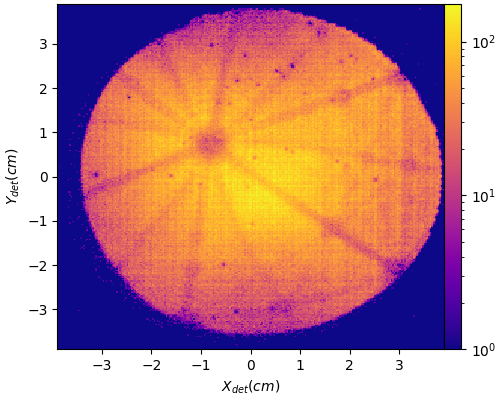

In [59]:
# Plot and select the FDM
data_loadcrop.plot_crop_FDM(data_crop, variables, bins=(256, 256), data_crop=True, figure_size=(5, 4), circle=False, save=True)

$\text {The region selected in the previous step is displayed below.}$

x: 0.1804732078846123 y: 0.09155712833829899 roi: 3.486295762144465


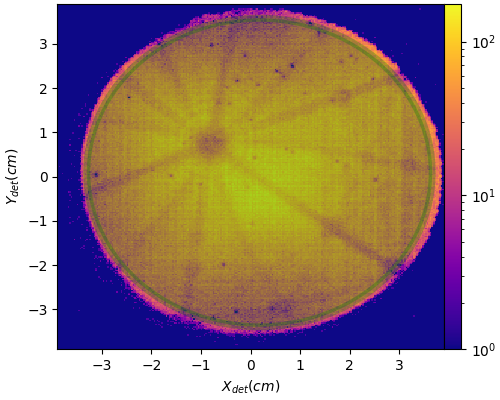

In [64]:
# plot selected area in FDM
data_loadcrop.plot_crop_FDM(data_crop, variables, bins=(256, 256), data_crop=False, figure_size=(5, 4), circle=True, save=True)

$\text {The final selected data after processing is shown below.}$

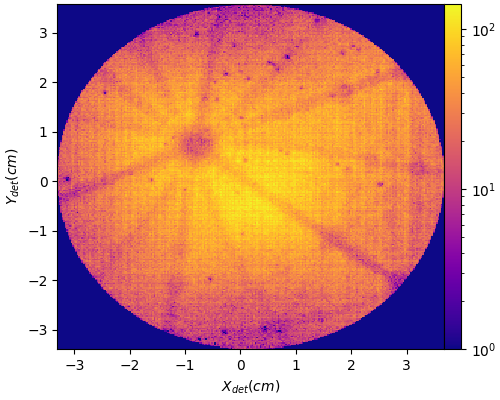

In [66]:
# Crop and plot the dataset
data = data_loadcrop.crop_data_after_selection(data, variables)
data_loadcrop.plot_crop_FDM(data_crop, variables, bins=(256, 256), data_crop=False, figure_size=(5, 4), circle=False, save=True)

$\text {Calculate pulses since the last event pulse and ions per pulse.}$

In [69]:
pulse_pi, ion_pp = data_loadcrop.calculate_ppi_and_ipp(data_crop)


# add two calculated array to the croped dataset
data_crop['pulse_pi'] = pulse_pi.astype(np.uintc)
data_crop['ion_pp'] = ion_pp.astype(np.uintc)


$\text {The percentage of loss in ROI selection process.}$

In [70]:
# save the cropped data

print('tof Crop Loss {:.2f} %'.format(((1 - len(data_crop) / len(data)) * 100)))

NameError: name 'data_crop_FDM' is not defined

In [53]:
# exctract needed data from Pandas data frame as an numpy array
dld_highVoltage = data_crop['high_voltage (V)'].to_numpy()
dld_pulseVoltage = data_crop['pulse'].to_numpy()
dld_t = data_crop['t (ns)'].to_numpy()
dld_x = data_crop['x_det (cm)'].to_numpy()
dld_y = data_crop['y_det (cm)'].to_numpy()
# calculate the mc
mc_seb_ini = mc_tools.tof2mc(dld_t, t0_d.value, dld_highVoltage, dld_pulseVoltage, dld_x, dld_y, flightPathLength_d.value, mode=pulse_mode.value)

data_crop.insert(0, 'x (nm)', np.zeros(len(mc_seb_ini)))
data_crop.insert(1, 'y (nm)', np.zeros(len(mc_seb_ini)))
data_crop.insert(2,'z (nm)', np.zeros(len(mc_seb_ini)))

data_crop.insert(4, 'mc (Da)', mc_seb_ini)
data_crop.insert(3,'mc_c (Da)', np.zeros(len(mc_seb_ini)))


data_crop.insert(9,'t_c (ns)', np.zeros(len(mc_seb_ini)))

$\text {Remove the data with mc biger than max mc.}$

In [54]:
# Remove the data with mc biger than max mc
mask = (data_crop['mc (Da)'].to_numpy() > max_mc.value)
print('The number of data over max_mc:', len(mask[mask==True]))
data_crop.drop(np.where(mask)[0], inplace=True)
data_crop.reset_index(inplace=True, drop=True)

The number of data over max_mc: 27175


C:\Users\APTUser\AppData\Local\Temp\ipykernel_17584\2594199460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_crop_FDM.drop(np.where(mask)[0], inplace=True)


The peak index for MRP calculation is: 3


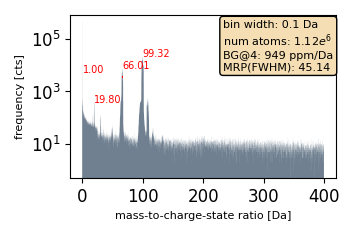

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): 45.136363636363654
Peaks  0 is at location and height: (1.00, 5278.00) peak window sides (50.00%) are: (0.90, 1.00)
Peaks  1 is at location and height: (19.80, 387.00) peak window sides (50.00%) are: (19.50, 20.00)
Peaks  2 is at location and height: (66.01, 7462.00) peak window sides (50.00%) are: (65.31, 66.91)
Peaks  3 is at location and height: (99.32, 20556.00) peak window sides (50.00%) are: (98.42, 100.62)


In [55]:
percent_mrp = 50
# background = {'calculation': True, 'plot_no_back': True, 'plot': True, 'mode': 'fabc', 'patch': False, 'lam': 1e4, 'num_std': 10.0}
background = {'calculation': False}
# non_peaks = np.array([[2,10], [18,10], [26, 10], [200, 10], [300, 10], [400, 10]])
# background = {'calculation': True, 'plot_no_back': False, 'plot': True, 'mode': 'selective_mask_mc', 'patch': False, 'lam': 1e4, 'num_std': 7.0, 'non_mask': non_peaks}


peaks_ini, peaks_y_ini, peak_widths_p_ini = tools.hist_plot(data_crop_FDM['mc (Da)'], 0.1, prominence=200, distance=100, h_line=True, text_loc='right', percent=percent_mrp, plot=True, label='mc', fig_name='mc', background=background)
index_max_ini = np.argmax(peaks_y_ini)
mrp = (peaks_ini[index_max_ini] / (peak_widths_p_ini[index_max_ini][2] - peak_widths_p_ini[index_max_ini][1]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
for i in range(len(peaks_ini)):
    print('Peaks ', i, 'is at location and height: ({:.2f}, {:.2f})'.format(peaks_ini[i], peaks_y_ini[i]), 'peak window sides ({:.2f}%) are: ({:.2f}, {:.2f})'.format(percent_mrp, peak_widths_p_ini[i][1], peak_widths_p_ini[i][2]))
    

In [56]:
# Remove the data with x,y,t = 0
mask1 = (data_crop_FDM['x (nm)'].to_numpy() == 0)
mask2 = (data_crop_FDM['y (nm)'].to_numpy() == 0)
mask3 = (data_crop_FDM['t (ns)'].to_numpy() == 0)
mask = np.logical_and(mask1, mask2)
mask = np.logical_and(mask, mask3)
print('The number of data over max_mc:', len(mask[mask==True]))
data_crop_FDM.drop(np.where(mask)[0], inplace=True)
data_crop_FDM.reset_index(inplace=True, drop=True)

The number of data over max_mc: 430655


C:\Users\APTUser\AppData\Local\Temp\ipykernel_17584\2640384541.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_crop_FDM.drop(np.where(mask)[0], inplace=True)


In [57]:
data_crop_FDM

,x (nm),y (nm),z (nm),mc_c (Da),mc (Da),high_voltage (V),pulse (deg),start_counter,t (ns),t_c (ns),x_det (cm),y_det (cm),pulse_pi,ion_pp
0,0.0,0.0,0.0,0.0,0.866215,8118.056152,230.0,214.0,214.0,0.0,1.032970,0.558104,0,1
1,0.0,0.0,0.0,0.0,101.605702,8118.056152,230.0,2007.0,2007.0,0.0,-2.864820,-1.211240,1793,1
2,0.0,0.0,0.0,0.0,340.906069,8118.056152,230.0,3643.0,3643.0,0.0,-2.689240,0.717955,3643,1
3,0.0,0.0,0.0,0.0,334.185929,8118.056152,230.0,3615.0,3615.0,0.0,-0.171491,-3.212160,0,0
4,0.0,0.0,0.0,0.0,98.995943,8118.056152,230.0,1983.0,1983.0,0.0,-3.106970,0.977451,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690611,0.0,0.0,0.0,0.0,65.528238,7221.176270,242.0,1706.0,1706.0,0.0,1.399840,1.460980,1706,1
690612,0.0,0.0,0.0,0.0,100.876531,7221.176270,242.0,2121.0,2121.0,0.0,-2.308090,2.408430,415,1
690613,0.0,0.0,0.0,0.0,98.712700,7221.176270,242.0,2096.0,2096.0,0.0,3.067440,-0.521695,4294967271,1
690614,0.0,0.0,0.0,0.0,99.510744,7221.176270,242.0,2099.0,2099.0,0.0,-0.463658,-2.527050,2099,1


In [58]:
data_crop_FDM.dtypes

x (nm)              float64
y (nm)              float64
z (nm)              float64
mc_c (Da)           float64
mc (Da)             float64
high_voltage (V)    float64
pulse (deg)         float64
start_counter       float64
t (ns)              float64
t_c (ns)            float64
x_det (cm)          float64
y_det (cm)          float64
pulse_pi             uint32
ion_pp               uint32
dtype: object

In [59]:
# save the dataset to hdf5 file
hierarchyName = 'df'
data_tools.store_df_to_hdf(savename, data_crop_FDM, hierarchyName)

In [ ]:
# save data as epos file
epos = ccapt_tools.ccapt_to_epos(data_crop_FDM, pulse_mode=pulse_mode.value, path=variables.result_path, name=dataset_name + '.epos')
pos = ccapt_tools.ccapt_to_pos(data_crop_FDM, path=variables.result_path, name=dataset_name + '.pos')

In [ ]:
# save data in csv format
data_tools.store_df_to_csv(data_crop_FDM, variables.result_path + dataset_name + '.csv')